In [34]:
import pandas as pd

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
df = pd.read_csv("cleaned_cosmetics_data.csv")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [36]:
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount
0,2,ultra color rich extra plump lipstick-all shades,0.0,unknown,4,new avon llc,avon,44,makeup products (non-permanent),53,"lip color - lipsticks, liners, and pencils",656,6,titanium dioxide,2009-06-17,2013-08-28,2009-07-09,2009-07-09,1
1,3,glover's medicated shampoo,0.0,unknown,338,j. strickland & co.,glover's,18,hair care products (non-coloring),25,hair shampoos (making a cosmetic claim),889,4,distillates (coal tar),2009-07-01,2009-07-01,2009-07-01,2009-07-01,2
2,3,glover's medicated shampoo,0.0,unknown,338,j. strickland & co.,glover's,18,hair care products (non-coloring),25,hair shampoos (making a cosmetic claim),293,5,estragole,2009-07-01,2009-07-01,2009-07-02,2009-07-02,2
3,4,precision glimmer eye liner-all shades �,0.0,unknown,4,new avon llc,avon,44,makeup products (non-permanent),46,eyeliner/eyebrow pencils,656,7,titanium dioxide,2009-07-09,2013-08-28,2009-07-09,2009-07-09,1
4,5,avon brilliant shine lip gloss-all shades �,0.0,unknown,4,new avon llc,avon,44,makeup products (non-permanent),52,lip gloss/shine,656,8,titanium dioxide,2009-07-09,2013-08-28,2009-07-09,2009-07-09,1


In [38]:
df.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(114378, 19)

In [40]:
df.info()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114378 entries, 0 to 114377
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114378 non-null  int64  
 1   ProductName             114378 non-null  object 
 2   CSFId                   114378 non-null  float64
 3   CSF                     114378 non-null  object 
 4   CompanyId               114378 non-null  int64  
 5   CompanyName             114378 non-null  object 
 6   BrandName               114378 non-null  object 
 7   PrimaryCategoryId       114378 non-null  int64  
 8   PrimaryCategory         114378 non-null  object 
 9   SubCategoryId           114378 non-null  int64  
 10  SubCategory             114378 non-null  object 
 11  CasId                   114378 non-null  int64  
 12  ChemicalId              114378 non-null  int64  
 13  ChemicalName            114378 non-null  object 
 14  InitialDateReported 

In [41]:
# for the ease of analysis, shortened the name.
# Rename long chemical names for better visualization
chemical_name_replacements = {
    "retinol/retinyl esters, when in daily dosages in excess of 10,000 iu, or 3,000 retinol equivalents.": "Retinol/Retinyl Esters",
    "silica, crystalline (airborne particles of respirable size)": "Silica, Crystalline"
}

df["ChemicalName"] = df["ChemicalName"].replace(chemical_name_replacements)



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Guiding question1: Which brands have the highest number of reported hazardous chemicals, and what are the most frequently reported chemicals?

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-43-acf120ebf467>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




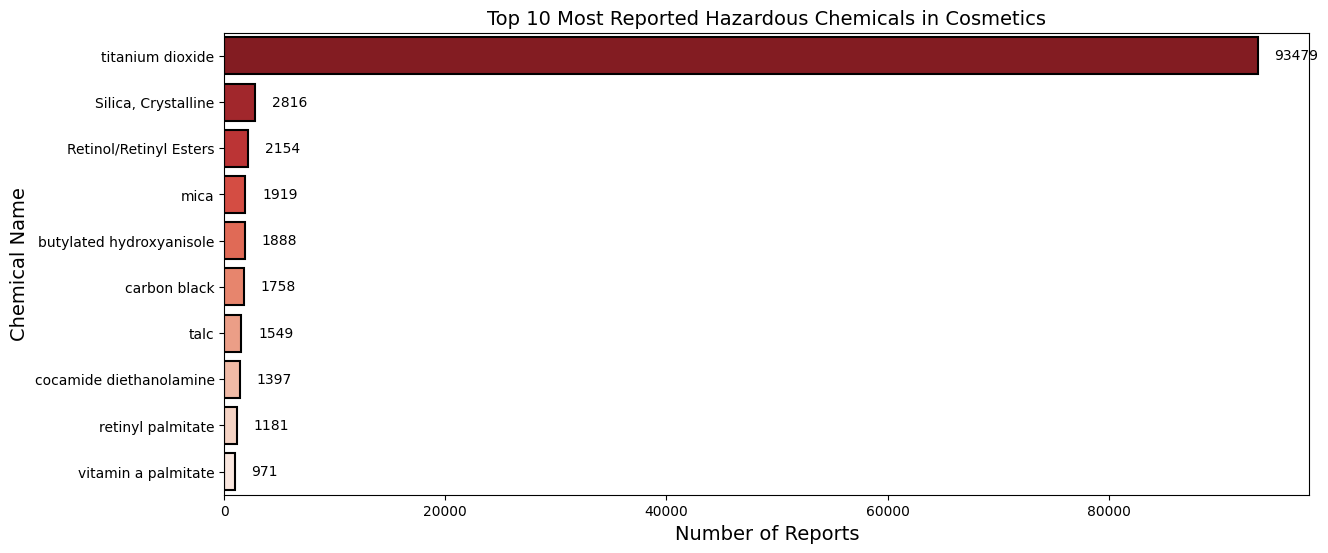

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most reported hazardous chemicals
top_chemicals = df["ChemicalName"].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_chemicals.values, y=top_chemicals.index, palette="Reds_r", edgecolor="black", linewidth=1.5)

plt.xlabel("Number of Reports", fontsize=14)
plt.ylabel("Chemical Name", fontsize=14)
plt.title("Top 10 Most Reported Hazardous Chemicals in Cosmetics", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add labels on bars
for index, value in enumerate(top_chemicals.values):
    plt.text(value + 1500, index, str(value), va='center', fontsize=10, color='black')

plt.show()



The dataset reveals the most commonly reported hazardous chemicals in cosmetic products.
Titanium Dioxide is the most frequently reported, with 86,790 reports, significantly higher than any other chemical.
Other commonly reported chemicals include Silica (Crystalline), Retinol Esters, Mica, Carbon Black, and Talc.
These chemicals are widely used in skincare, makeup, and personal care products.


<ipython-input-8-d8d6ae311638>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="Reds_r", edgecolor="black", linewidth=1.5)


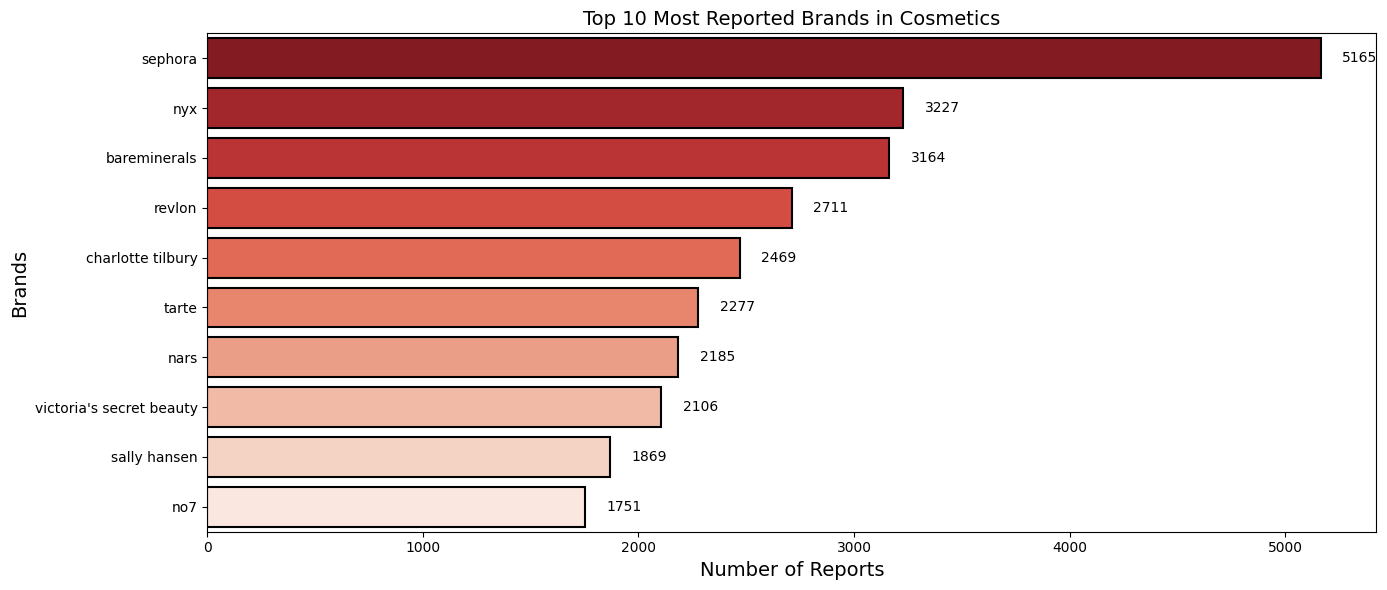

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most reported hazardous chemicals
top_brands = df["BrandName"].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="Reds_r", edgecolor="black", linewidth=1.5)

plt.xlabel("Number of Reports", fontsize=14)
plt.ylabel("Brands", fontsize=14)
plt.title("Top 10 Most Reported Brands in Cosmetics", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add labels on bars (closer to the end of the bar)
for index, value in enumerate(top_brands.values):
    plt.text(value + 100, index, str(value), va='center', fontsize=10, color='black')  # Adjusted label positioning

plt.tight_layout()
plt.show()


The most reported brands include Sephora, BareMinerals, Tarte, NARS, Revlon, among others.
Sephora has the highest number of reports (5,072), indicating a higher volume of products containing hazardous chemicals.
Some brands may appear due to their wide product range, while others may have
specific formulations that contain reported chemicals. This analysis helps
identify trends in chemical reporting across major cosmetic brands.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



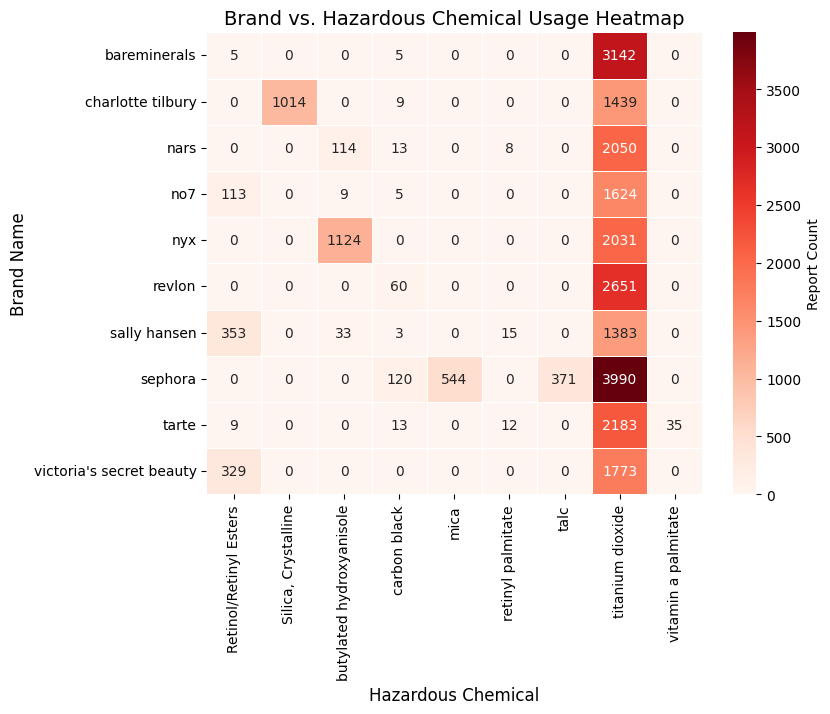

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for the top 10 brands with the most reported hazardous chemicals
top_brands = df["BrandName"].value_counts().head(10).index
df_top_brands = df[df["BrandName"].isin(top_brands)]

# Filter for the top 10 hazardous chemicals
top_chemicals = df["ChemicalName"].value_counts().head(10).index
df_top_chemicals = df_top_brands[df_top_brands["ChemicalName"].isin(top_chemicals)]

# Create a pivot table for brand vs. chemical count
brand_chemical_matrix = df_top_chemicals.pivot_table(
    index="BrandName",
    columns="ChemicalName",
    aggfunc="size",
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(brand_chemical_matrix, cmap="Reds", annot=True, fmt="d", linewidths=0.5, cbar_kws={"label": "Report Count"})

# Labels and title
plt.xlabel("Hazardous Chemical", fontsize=12)
plt.ylabel("Brand Name", fontsize=12)
plt.title("Brand vs. Hazardous Chemical Usage Heatmap", fontsize=14)

# Show plot
plt.show()





What is the distribution of hazardous chemicals across different cosmetic product categories?


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 500x700 with 0 Axes>

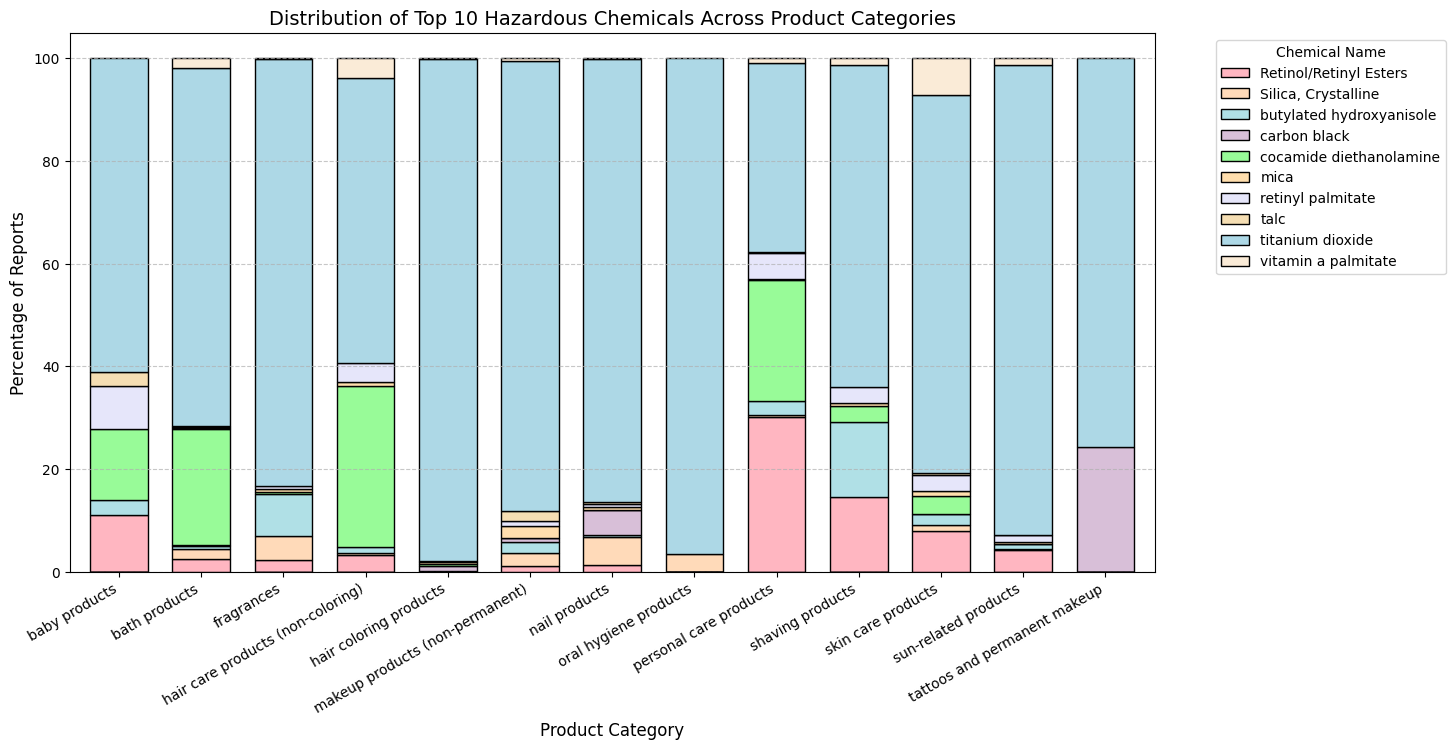

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 hazardous chemicals
top_chemicals = df["ChemicalName"].value_counts().head(10).index

# Filter dataset for only the top chemicals
df_top_chemicals = df[df["ChemicalName"].isin(top_chemicals)]

# Count occurrences of each chemical within each category
chemical_category_counts = df_top_chemicals.groupby(["PrimaryCategory", "ChemicalName"]).size().unstack().fillna(0)

# Convert counts to percentages (Normalize)
chemical_category_percent = chemical_category_counts.div(chemical_category_counts.sum(axis=1), axis=0) * 100

# Define a **custom pastel color palette**
colors = [
    "#FFB6C1",  # Light Pink
    "#FFDAB9",  # Peach
    "#B0E0E6",  # Powder Blue
    "#D8BFD8",  # Lavender
    "#98FB98",  # Pale Green
    "#FFDEAD",  # Navajo White
    "#E6E6FA",  # Light Lavender
    "#F5DEB3",  # Wheat (Soft Beige)
    "#ADD8E6",  # Light Blue
    "#FAEBD7"   # Antique White
]

# Plot stacked bar chart with pastel colors
plt.figure(figsize=(5, 7))
chemical_category_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    color=colors,  # Use custom pastel colors
    edgecolor="black",
    width=0.7
)

# Improve x-axis labels
plt.xticks(rotation=30, ha='right', fontsize=10)

# Improve labeling and layout
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Percentage of Reports", fontsize=12)
plt.title("Distribution of Top 10 Hazardous Chemicals Across Product Categories", fontsize=14)
plt.legend(title="Chemical Name", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



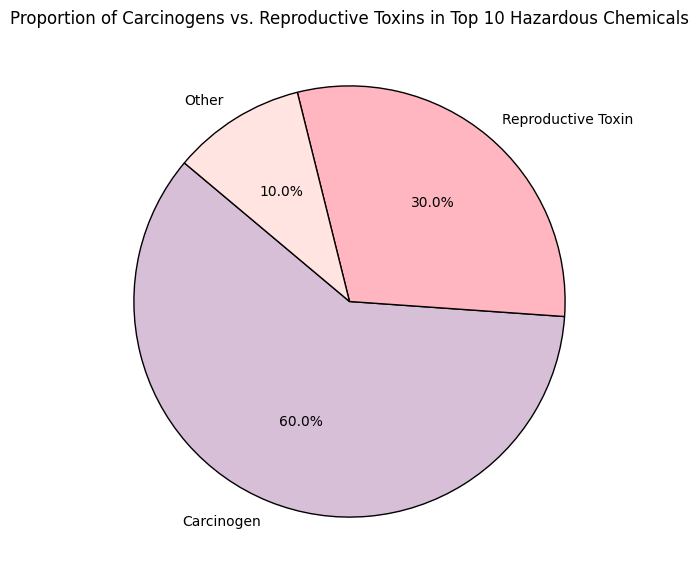

In [46]:
import matplotlib.pyplot as plt

# Manually classify the top 10 chemicals into Carcinogens and Reproductive Toxins
chemical_classification = {
    "Titanium Dioxide": "Carcinogen",
    "Silica, Crystalline (Airborne Particles)": "Carcinogen",
    "Retinol/Retinyl Esters": "Reproductive Toxin",
    "Mica": "Other",
    "Carbon Black": "Carcinogen",
    "Talc": "Carcinogen",
    "Cocamide DEA": "Carcinogen",
    "Butylated Hydroxyanisole (BHA)": "Carcinogen",
    "Retinyl Palmitate": "Reproductive Toxin",
    "Vitamin A Palmitate": "Reproductive Toxin"
}

# Count occurrences of each classification
classification_counts = {"Carcinogen": 0, "Reproductive Toxin": 0, "Other": 0}

for chem, category in chemical_classification.items():
    classification_counts[category] += 1

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    classification_counts.values(),
    labels=classification_counts.keys(),
    autopct="%1.1f%%",
    colors = ["#D8BFD8" ,"#FFB6C1",  "#FFE4E1"]  # Pastel pink, peach, and blue
,
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Proportion of Carcinogens vs. Reproductive Toxins in Top 10 Hazardous Chemicals")
plt.show()



Guiding question 3: How many products contain multiple hazardous chemicals?


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-47-e6646012aa29>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




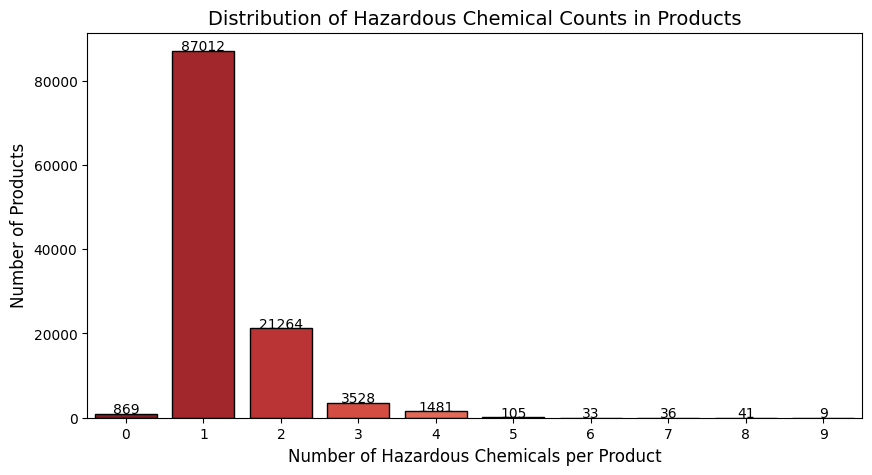

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert ChemicalCount to numeric (in case it's stored as a string)
df["ChemicalCount"] = pd.to_numeric(df["ChemicalCount"], errors="coerce")

# Count how many products have 1, 2, 3, etc., hazardous chemicals
chemical_counts_distribution = df["ChemicalCount"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=chemical_counts_distribution.index, y=chemical_counts_distribution.values, palette="Reds_r", edgecolor="black")

# Improve labeling
plt.xlabel("Number of Hazardous Chemicals per Product", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.title("Distribution of Hazardous Chemical Counts in Products", fontsize=14)

# Show values on bars
for index, value in enumerate(chemical_counts_distribution.values):
    plt.text(index, value + 50, str(value), ha="center", fontsize=10, color="black")

# Show the plot
plt.show()



In [13]:
# # Ensure ChemicalCount is numeric
# df["ChemicalCount"] = pd.to_numeric(df["ChemicalCount"], errors="coerce")

# # Group by PrimaryCategory and count occurrences of 1, 2, 3, or more hazardous chemicals
# chemical_count_bins = df.groupby(["PrimaryCategory", "ChemicalCount"]).size().unstack().fillna(0)

# # Ensure all levels (1, 2, 3, 4+) are present in all categories
# for i in range(1, 5):
#     if i not in chemical_count_bins.columns:
#         chemical_count_bins[i] = 0

# # Group products with 4 or more hazardous chemicals into "4+"
# chemical_count_bins["4+"] = chemical_count_bins.loc[:, 4:].sum(axis=1)
# chemical_count_bins = chemical_count_bins[[1, 2, 3, "4+"]].astype(int)



Which hazardous chemicals were most frequently removed?

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-48-0b60186db805>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




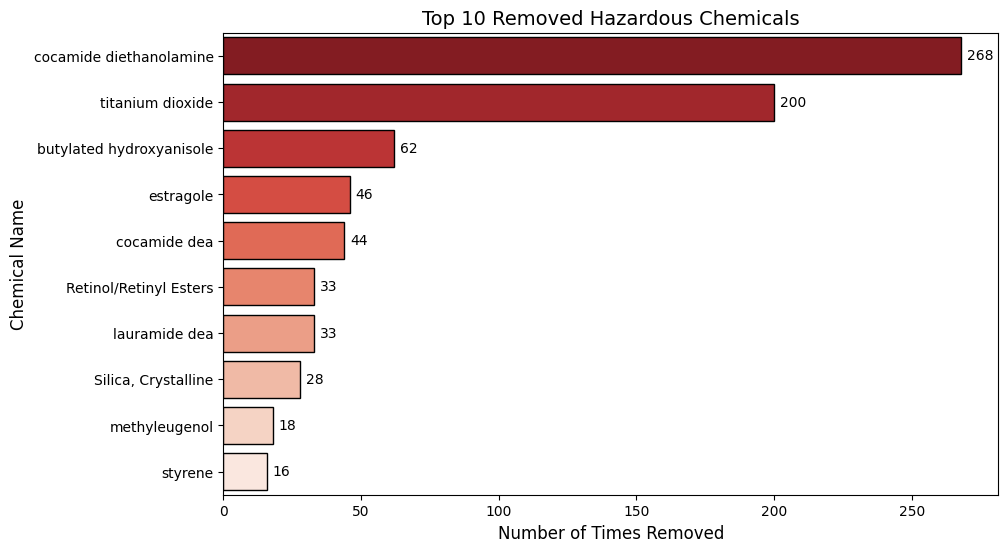

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of times each hazardous chemical was removed
removed_chemicals_count = df[df["ChemicalCount"] == 0]["ChemicalName"].value_counts().head(10)

# Data
labels = removed_chemicals_count.index
sizes = removed_chemicals_count.values

# Define pastel color palette for improved aesthetics

# Create figure
plt.figure(figsize=(10, 6))
sns.barplot(x=sizes, y=labels, palette="Reds_r", edgecolor="black")

# Labels and title
plt.xlabel("Number of Times Removed", fontsize=12)
plt.ylabel("Chemical Name", fontsize=12)
plt.title("Top 10 Removed Hazardous Chemicals", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display values on bars
for index, value in enumerate(sizes):
    plt.text(value + 2, index, str(value), va="center", fontsize=10)

# Show plot
plt.show()


Which product categories saw the most removals?

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-49-7e5e05b3482a>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




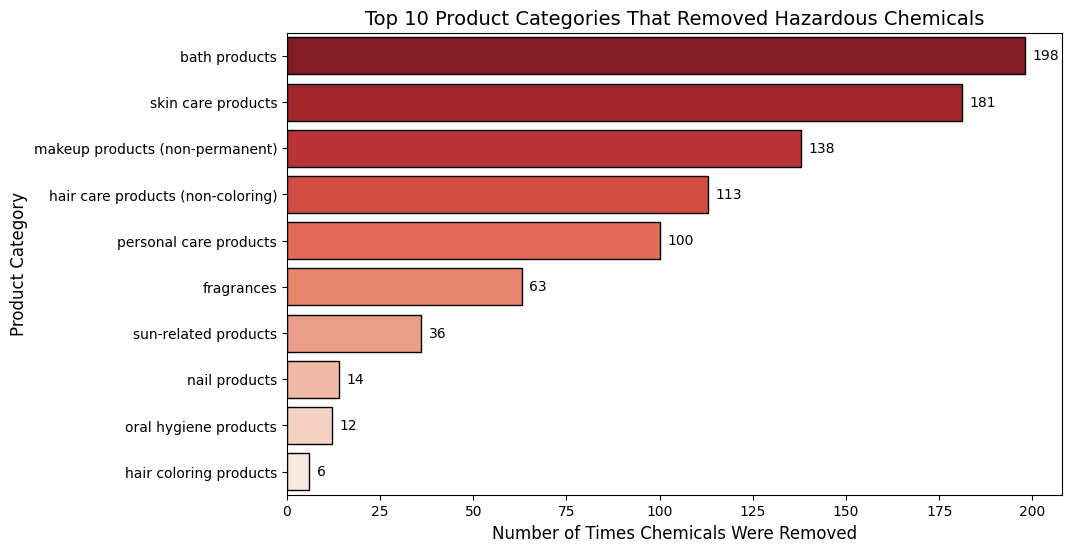

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure removed_by_category contains only the top categories
removed_by_category = df[df["ChemicalCount"] == 0]["PrimaryCategory"].value_counts().head(10)

# Data
labels = removed_by_category.index
sizes = removed_by_category.values

# Define a single pastel color for consistency
single_color = "#66B2FF"  # Light pastel blue

# Create figure
plt.figure(figsize=(10, 6))
sns.barplot(x=sizes, y=labels, palette = "Reds_r", edgecolor="black")

# Labels and title
plt.xlabel("Number of Times Chemicals Were Removed", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Top 10 Product Categories That Removed Hazardous Chemicals", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display values on bars
for index, value in enumerate(sizes):
    plt.text(value + 2, index, str(value), va="center", fontsize=10)

# Show plot
plt.show()


Which companies saw the most removals?

Which brands saw the most removals?

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-50-65750e15ac84>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




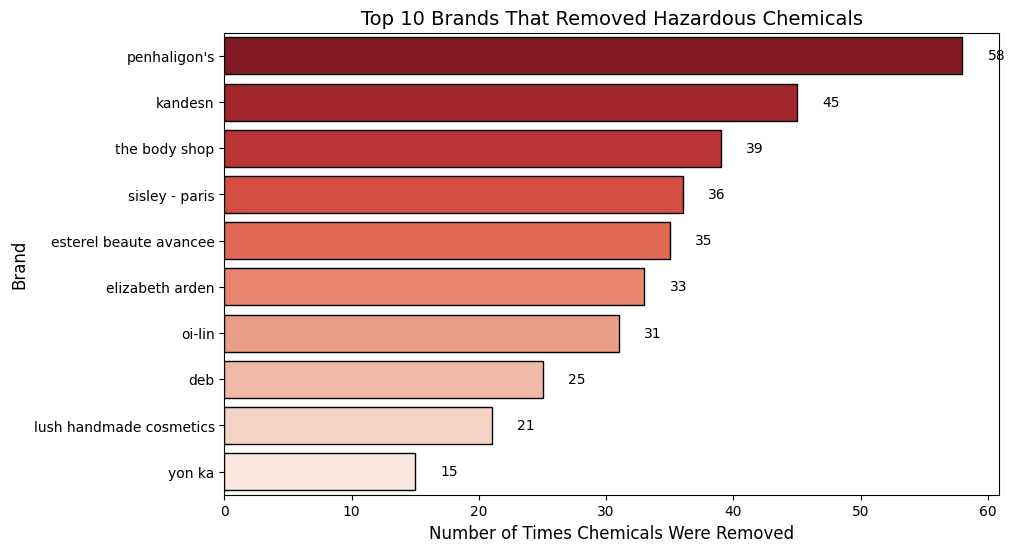

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure top_brands contains only the top brands with chemical removals
top_brands = df[df["ChemicalCount"] == 0]["BrandName"].value_counts().head(10)

# Data
labels = top_brands.index
sizes = top_brands.values



# Create figure
plt.figure(figsize=(10, 6))
sns.barplot(x=sizes, y=labels, palette = "Reds_r", edgecolor="black")

# Labels and title
plt.xlabel("Number of Times Chemicals Were Removed", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.title("Top 10 Brands That Removed Hazardous Chemicals", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display values on bars
for index, value in enumerate(sizes):
    plt.text(value + 2, index, str(value), va="center", fontsize=10)

# Show plot
plt.show()


Guiding question4: Are certain chemicals consistently reported over time, or do new ones emerge?

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



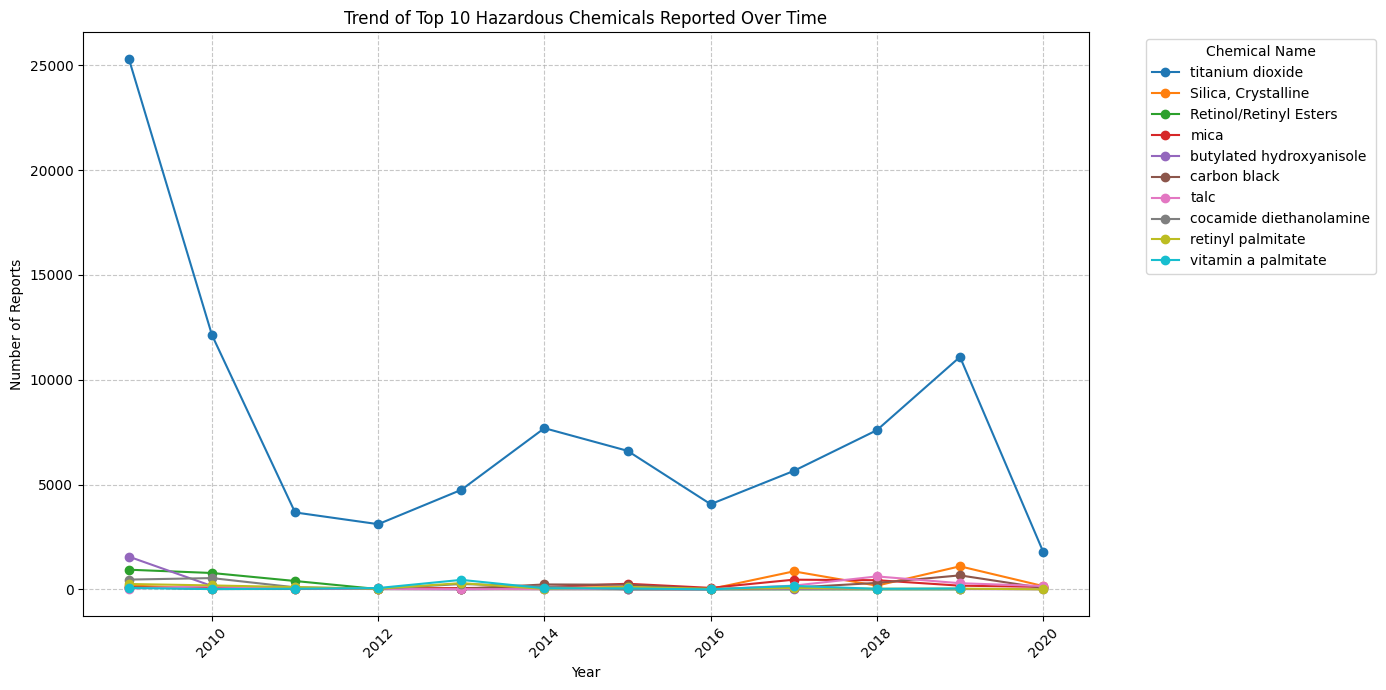

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert dates to year format
df["InitialDateReported"] = pd.to_datetime(df["InitialDateReported"])
df["YearReported"] = df["InitialDateReported"].dt.year

# Select top 10 most reported hazardous chemicals
top_chemicals = df["ChemicalName"].value_counts().head(10).index

# Filter data for these top chemicals
df_top_chemicals = df[df["ChemicalName"].isin(top_chemicals)]

# Aggregate the number of reports per year for each chemical
chemical_trends = df_top_chemicals.groupby(["YearReported", "ChemicalName"]).size().reset_index(name="ReportCount")

# Create the figure
plt.figure(figsize=(14, 7))

# Plot each chemical's trend separately
for chemical in top_chemicals:
    data = chemical_trends[chemical_trends["ChemicalName"] == chemical]
    plt.plot(data["YearReported"], data["ReportCount"], marker="o", linestyle="-", label=chemical)

# Customize the plot
plt.title("Trend of Top 10 Hazardous Chemicals Reported Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True, linestyle="--", alpha=0.7)  # Light grid for better readability
plt.legend(title="Chemical Name", bbox_to_anchor=(1.05, 1), loc="upper left")  # Place legend outside
plt.tight_layout()  # Adjust layout to avoid overlap

# Show the plot
plt.show()


A sub-analysis per category (e.g., makeup vs. skincare vs. haircare) could reveal which product types are driving these trends.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 1400x700 with 0 Axes>

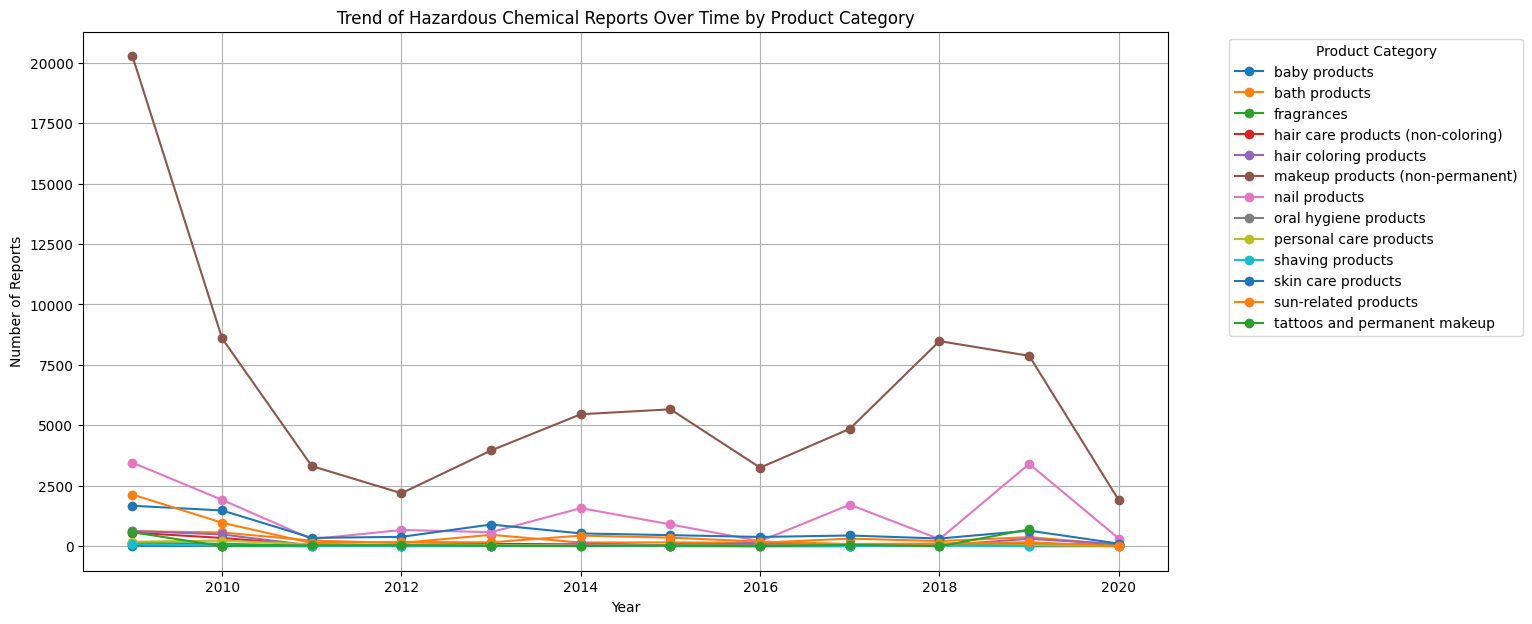

In [52]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the InitialDateReported column to datetime format and extract the year
df["InitialDateReported"] = pd.to_datetime(df["InitialDateReported"], errors='coerce')
df["Year"] = df["InitialDateReported"].dt.year

# Group by Year and PrimaryCategory to count the number of reports for all 13 categories
trend_data_all = df.groupby(["Year", "PrimaryCategory"]).size().unstack()

# Plot trends for all product categories over time

plt.figure(figsize=(14, 7))
trend_data_all.plot(marker='o', linestyle='-', figsize=(14, 7))

# Customize the plot
plt.title("Trend of Hazardous Chemical Reports Over Time by Product Category")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the graph
plt.show()



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



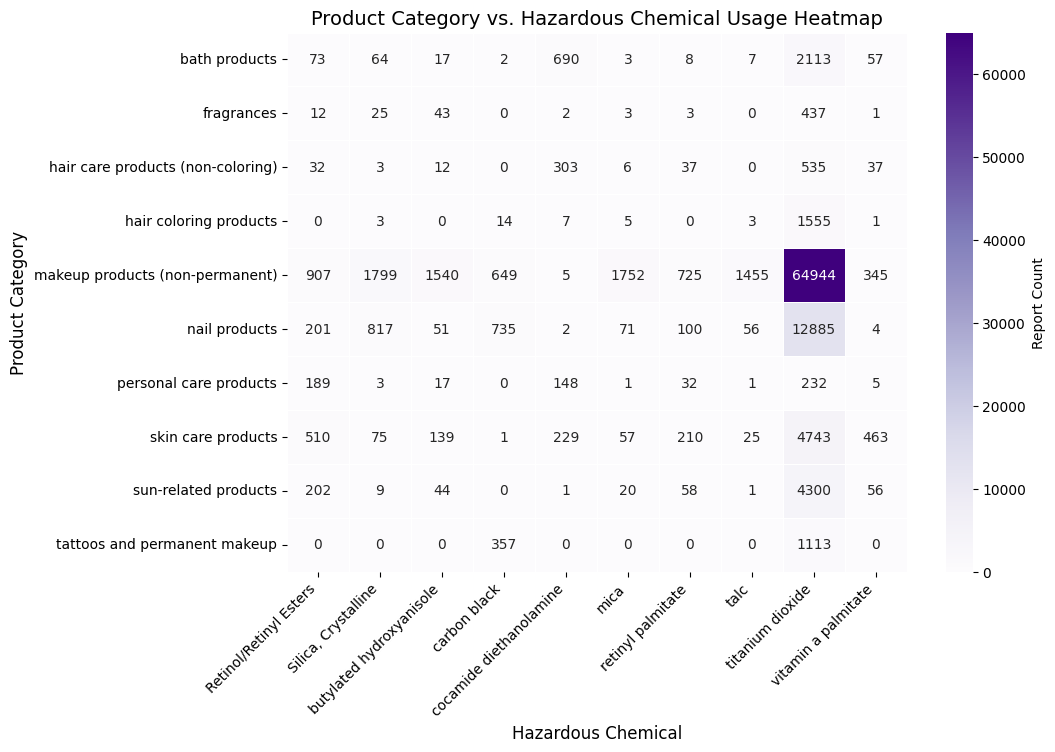

In [53]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for the top 10 product categories with the most reported hazardous chemicals
top_categories = df["PrimaryCategory"].value_counts().head(10).index
df_top_categories = df[df["PrimaryCategory"].isin(top_categories)]

# Filter for the top 10 hazardous chemicals
top_chemicals = df["ChemicalName"].value_counts().head(10).index
df_top_chemicals = df_top_categories[df_top_categories["ChemicalName"].isin(top_chemicals)]

# Create a pivot table for category vs. chemical count
category_chemical_matrix = df_top_chemicals.pivot_table(
    index="PrimaryCategory",
    columns="ChemicalName",
    aggfunc="size",
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(category_chemical_matrix, cmap="Purples", annot=True, fmt="d", linewidths=0.5, cbar_kws={"label": "Report Count"})

# Labels and title
plt.xlabel("Hazardous Chemical", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Product Category vs. Hazardous Chemical Usage Heatmap", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


Guiding question 5: Which brands are most associated with hazardous chemicals, and in which product categories and sub categories do these reports appear the most?

guiding question 5: Do Well-Known Brands Have Fewer Harmful Ingredients Compared to Smaller Brands?

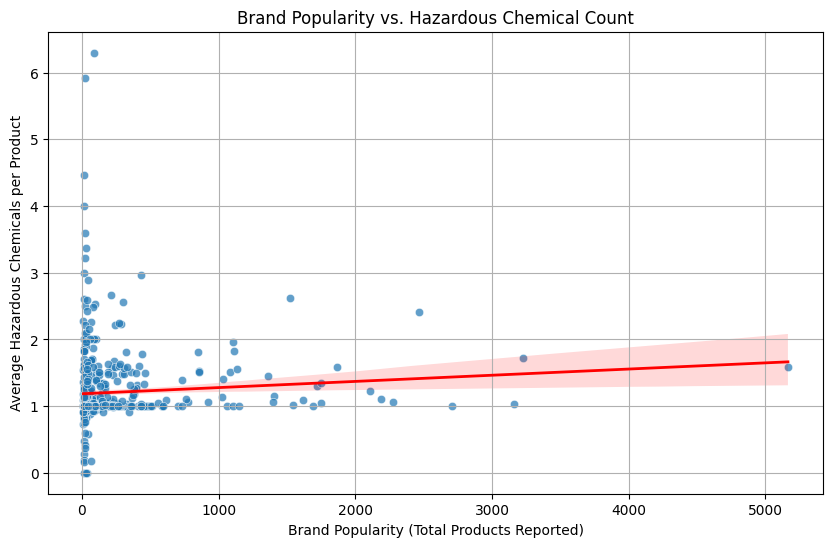

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data: Total number of products per brand (popularity) & average chemical count per product
brand_stats = df.groupby("BrandName").agg(
    total_products=("ProductName", "count"),
    avg_chemical_count=("ChemicalCount", "mean")
).reset_index()

# Filter out extremely small brands (optional)
brand_stats = brand_stats[brand_stats["total_products"] > 10]

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_stats, x="total_products", y="avg_chemical_count", alpha=0.7)

# Trend Line (Regression Line)
sns.regplot(data=brand_stats, x="total_products", y="avg_chemical_count", scatter=False, color="red", line_kws={"linewidth":2})

# Labels and Title
plt.xlabel("Brand Popularity (Total Products Reported)")
plt.ylabel("Average Hazardous Chemicals per Product")
plt.title("Brand Popularity vs. Hazardous Chemical Count")
plt.grid(True)

# Show Plot
plt.show()



In [54]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load the dataset (update the file path as needed)
file_path = "cleaned_cosmetics_data.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Select the column to analyze (SubCategory)
text_column = 'SubCategory'
unique_subcategories = df[text_column].dropna().unique()  # Remove NaN values

# Convert text data into a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Reduce feature space
text_matrix = vectorizer.fit_transform(unique_subcategories)

# Define number of topics
num_topics = 5

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, learning_method='batch')
lda_model.fit(text_matrix)

# Extract top words for each topic
words = vectorizer.get_feature_names_out()
top_words_per_topic = {
    f"Topic {i+1}": [words[idx] for idx in lda_model.components_[i].argsort()[-10:][::-1]]
    for i in range(num_topics)
}

# Convert to DataFrame for better readability
topics_df = pd.DataFrame(top_words_per_topic)

# Display extracted topics
print("Extracted Topics:")
print(topics_df)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Extracted Topics:
     Topic 1    Topic 2     Topic 3   Topic 4     Topic 5
0   products       nail       claim      hair    perfumes
1       hair     polish      making   product         lip
2     makeup   shampoos    cosmetic  coloring      facial
3      teeth     enamel        skin      care     pencils
4       anti      cream    products      baby        eaux
5     sprays       hair        bath   powders        body
6    powders  softeners        care    makeup       color
7  permanent    shaving  fragrances   related  fresheners
8  whitening  cleansers        baby    powder     lotions
9   cleaning   dandruff   bleaching  personal   lipsticks


In [55]:
!pip install --upgrade pyLDAvis  # Update pyLDAvis to the latest version


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
#import pyLDAvis.sklearn
import numpy as np

# Load dataset
file_path = "cleaned_cosmetics_data.csv"
df = pd.read_csv(file_path)

# Select text column for topic modeling
text_column = 'SubCategory'  # Change to 'SubCategory' if needed
unique_texts = df[text_column].dropna().unique()

# Convert text data into a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_features=1500)
text_matrix = vectorizer.fit_transform(unique_texts)

# Apply LDA
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, learning_method='batch')
lda_model.fit(text_matrix)

# Prepare pyLDAvis visualization
pyLDAvis.enable_notebook()

# Pass arguments positionally as required by older pyLDAvis versions
# lda_vis = pyLDAvis.prepare(lda_model, text_matrix, vectorizer)
# Pass arguments as required by latest pyLDAvis versions
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_,
    doc_topic_dists=lda_model.transform(text_matrix),
    doc_lengths=np.array(text_matrix.sum(axis=1)).flatten(),  # Convert to 1D array
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=text_matrix.sum(axis=0).A1  # Convert to 1D array
)


# Show visualization
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [56]:
import plotly.graph_objects as go
import plotly.subplots as sp

def plot_horizontal_bar_charts_all_topics_plotly(lda_model, feature_names, num_topics):
    fig = sp.make_subplots(rows=num_topics, cols=1, shared_xaxes=True, subplot_titles=[f"Topic {i+1} - Word Frequencies" for i in range(num_topics)])

    # Define a list of colors (e.g., from a color palette)
    colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF9700', '#FECB52']  # Example colors

    for topic_idx, topic in enumerate(lda_model.components_):
        # Get top words for the topic
        topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-11:-1]}

        # Horizontal Bar Chart using Plotly with color
        fig.add_trace(
            go.Bar(
                y=list(topic_words.keys()),
                x=list(topic_words.values()),
                orientation='h',
                marker_color=colors[topic_idx % len(colors)]  # Assign color based on topic index
            ),
            row=topic_idx + 1, col=1
        )

    fig.update_layout(height=num_topics * 300, title_text="Horizontal Bar Charts for All Topics (Plotly)", showlegend=False)
    fig.show()

# Generate horizontal bar charts using Plotly
plot_horizontal_bar_charts_all_topics_plotly(lda_model, words, num_topics)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

